# Sales Forecasting and Demand Planning Project  

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Dataframe
pd.set_option("display.max_columns", None)

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "stores_sales_forecasting.csv")

### Data Loading and Understanding

In [3]:
# Load
df = pd.read_csv(csv_path, encoding="latin1")

In [4]:
# Show 1st 5 rows to understand what type of data stored in each feature
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
# Show last 5 rows to understand what type of data stored in each feature
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [6]:
# Data Description

def describe_data():
    print("=" * 60)
    print("DATA DESCRIPTION")
    print("=" * 60)
    print(f"Number of observations: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

describe_data()

DATA DESCRIPTION
Number of observations: 2121
Number of features: 21


In [7]:
# Feature Description
def describe_feature():
    print("=" * 60)
    print("FEATURE DESCRIPTION")
    print("=" * 60)
    print(df.dtypes)
    print("-" * 60)
    num_cols = [col for col in df.columns if df[col].dtype != 'object']
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    print(f"Number of numeric features: {len(num_cols)}")
    print(num_cols)
    print('-' * 60)
    print(f"Number of categorical features: {len(cat_cols)}")
    print(cat_cols)
    print('-' * 60)
    return num_cols, cat_cols

num_cols, cat_cols = describe_feature()

FEATURE DESCRIPTION
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object
------------------------------------------------------------
Number of numeric features: 6
['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
------------------------------------------------------------
Number of categorical features: 15
['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product 

In [8]:
# Missing Value Detection
def check_missing():
    print("=" * 60)
    print("MISSING VALUE DETECTION")
    print("=" * 60)
    if df.isnull().sum().sum() > 0:
        print(df.isnull().sum())
    else:
        print("No missing value present in any feature")

check_missing()

MISSING VALUE DETECTION
No missing value present in any feature


In [9]:
# Duplicate observations detection
def check_duplicate_rows():
    print("=" * 60)
    print("DUPLICATE VALUE DETECTION")
    print("=" * 60)
    print(f"Number of duplicate observations: {df.duplicated().sum()}")

check_duplicate_rows()

DUPLICATE VALUE DETECTION
Number of duplicate observations: 0


### Explore the Features

Explore each feature to understand and analyse the values present in them.

In [10]:
# Find number of unique Order ID to check total number of orders
unique_orders = df["Order ID"].nunique()
print(f"Total Number of orders: {unique_orders}")

Total Number of orders: 1764


In [11]:
# Find number of unique Customer ID to check total number of customers
unique_customers = df["Customer ID"].nunique()
print(f"Total Number of customers: {unique_customers}")

Total Number of customers: 707


SEGMENT COUNTS
       Segment  count
0     Consumer   1113
1    Corporate    646
2  Home Office    362





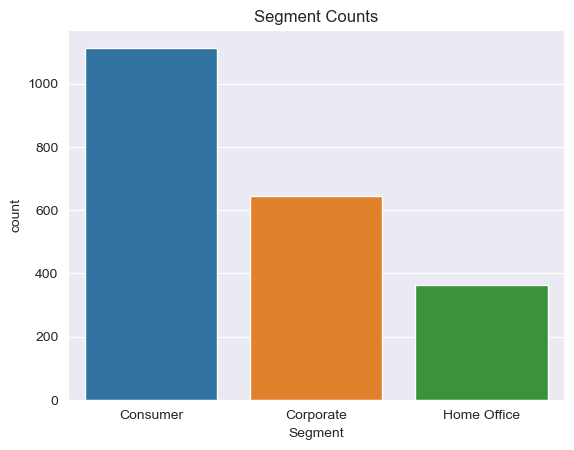

In [12]:
# Find Segment Classification of customers
col = "Segment"
segment_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"{col.upper()} COUNTS")
print("=" * 60)
print(segment_values)
print("\n\n")

# Visualize
sns.countplot(data= df, x= col, hue= col)
plt.title(f"{col} Counts")
plt.show()

COUNTRY COUNTS
         Country  count
0  United States   2121





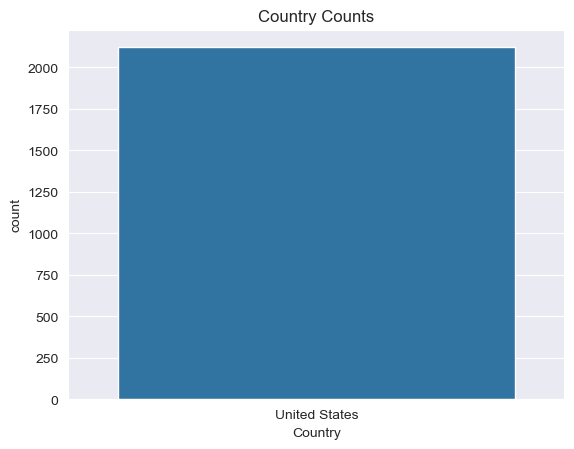

In [13]:
# Find Country of customers
country_values = df["Country"].value_counts().reset_index()
print("=" * 60)
print("COUNTRY COUNTS")
print("=" * 60)
print(country_values)
print("\n\n")

# Visualize
sns.countplot(data= df, x= "Country", hue= "Country")
plt.title("Country Counts")
plt.show()

Top 10 STATE COUNTS
          State  count
0    California    444
1      New York    236
2         Texas    202
3  Pennsylvania    125
4      Illinois    123
5    Washington    114
6          Ohio     93
7       Florida     85
8      Virginia     52
9      Colorado     51
Total number of states: 48





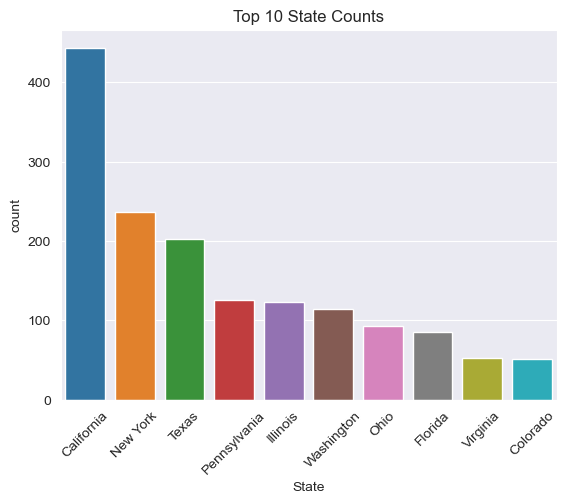

In [14]:
# Find State of customers
col = "State"
state_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"Top 10 {col.upper()} COUNTS")
print("=" * 60)
print(state_values.head(10))
print(f"Total number of states: {state_values.shape[0]}")
print("\n\n")

# Visualize
sns.barplot(data= state_values.head(10), x= col, y= "count", hue= col)
plt.title(f"Top 10 {col} Counts")
plt.xticks(rotation= 45)
plt.show()

Top 10 CITY COUNTS
            City  count
0  New York City    192
1    Los Angeles    154
2   Philadelphia    111
3  San Francisco    102
4        Seattle     97
5        Houston     81
6        Chicago     68
7       Columbus     48
8      San Diego     46
9        Detroit     28
Total number of cities: 371





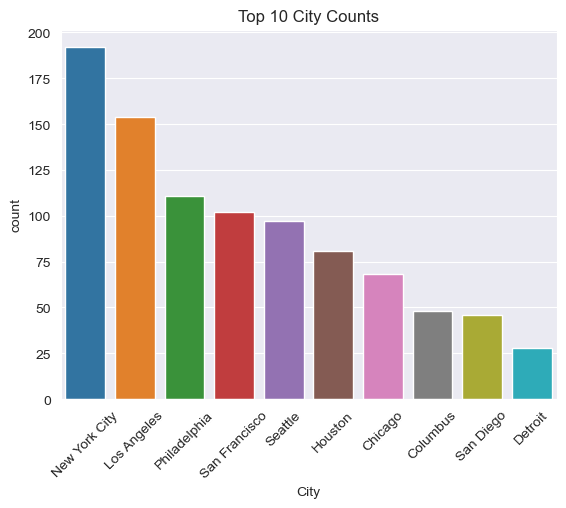

In [15]:
# Find City of customers
col = "City"
city_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"Top 10 {col.upper()} COUNTS")
print("=" * 60)
print(city_values.head(10))
print(f"Total number of cities: {city_values.shape[0]}")
print("\n\n")

# Visualize
sns.barplot(data= city_values.head(10), x= col, y= "count", hue= col)
plt.title(f"Top 10 {col} Counts")
plt.xticks(rotation= 45)
plt.show()

REGION COUNTS
    Region  count
0     West    707
1     East    601
2  Central    481
3    South    332





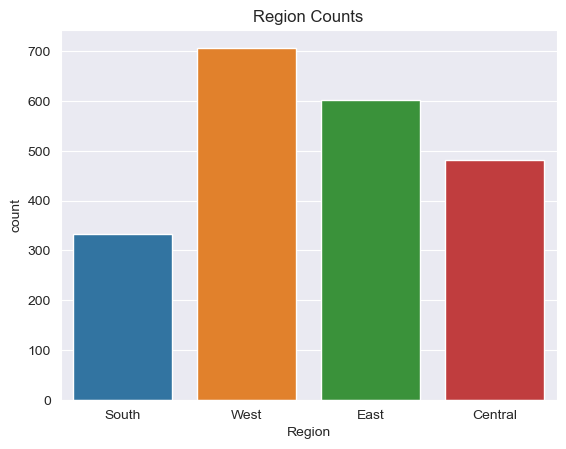

In [16]:
# Find region Classification of customers
col = "Region"
region_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"{col.upper()} COUNTS")
print("=" * 60)
print(region_values)
print("\n\n")

# Visualize
sns.countplot(data= df, x= col, hue= col)
plt.title(f"{col} Counts")
plt.show()

In [17]:
# Find number of unique Product ID to check total number of products
unique_products = df["Product ID"].nunique()
print(f"Total Number of products: {unique_products}")

Total Number of products: 375


CATEGORY COUNTS
    Category  count
0  Furniture   2121





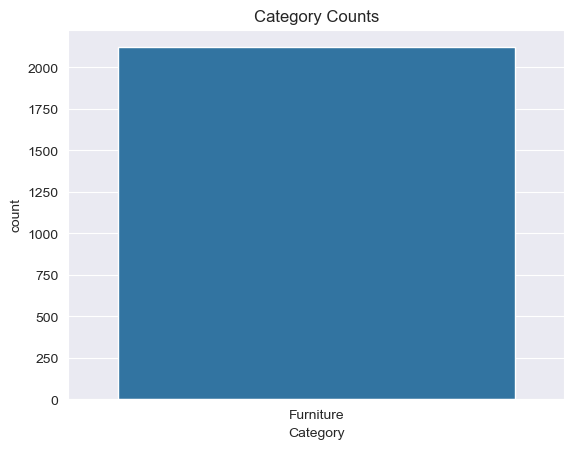

In [18]:
# Find cateroy Classification of products
col = "Category"
category_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"{col.upper()} COUNTS")
print("=" * 60)
print(category_values)
print("\n\n")

# Visualize
sns.countplot(data= df, x= col, hue= col)
plt.title(f"{col} Counts")
plt.show()

SUB-CATEGORY COUNTS
  Sub-Category  count
0  Furnishings    957
1       Chairs    617
2       Tables    319
3    Bookcases    228
Total number of sub-category: 4





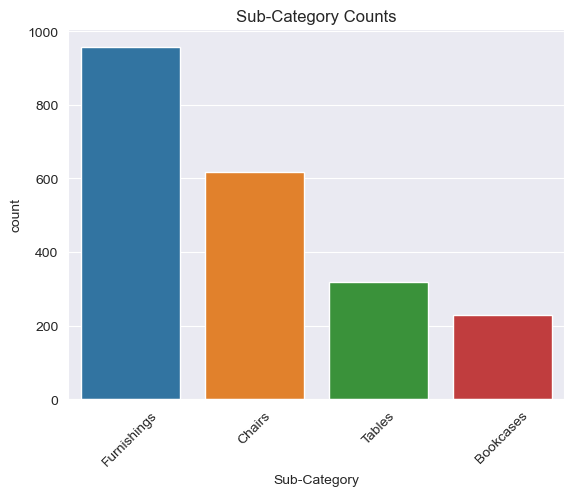

In [19]:
# Find Sub-category of Product
col = "Sub-Category"
subcat_values = df[col].value_counts().reset_index()
print("=" * 60)
print(f"{col.upper()} COUNTS")
print("=" * 60)
print(subcat_values)
print(f"Total number of sub-category: {subcat_values.shape[0]}")
print("\n\n")

# Visualize
sns.barplot(data= subcat_values, x= col, y= "count", hue= col)
plt.title(f"{col} Counts")
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 1.0, 'Sales Distribution')

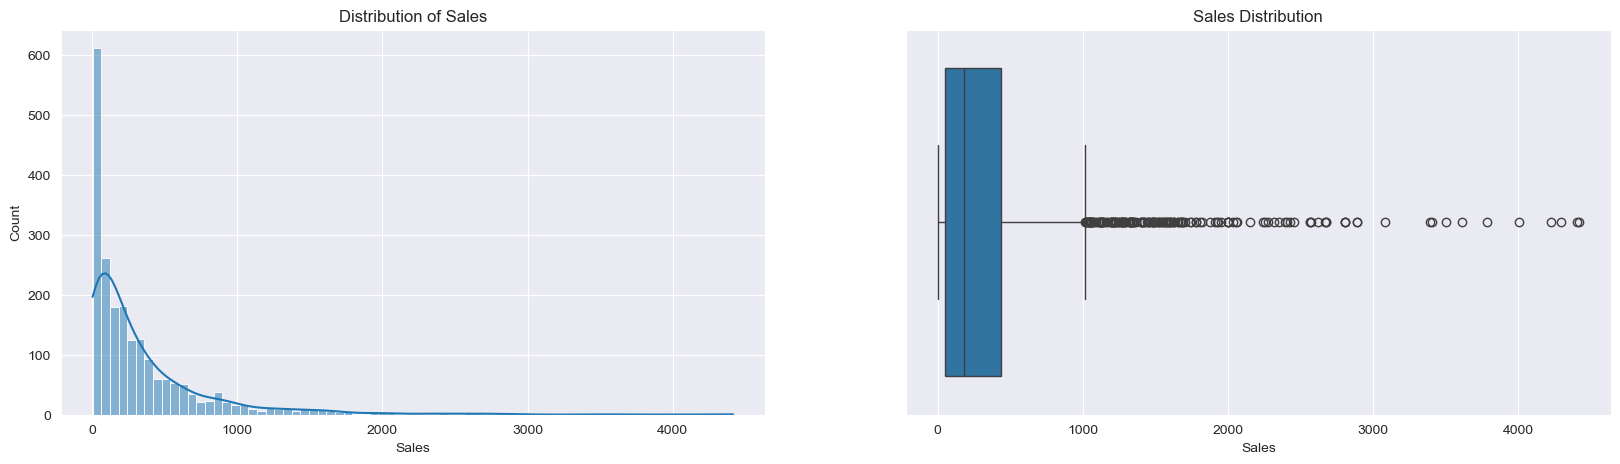

In [22]:
# Analysis of Sales
plt.figure(figsize=(20, 5))

# Distribution of sales
plt.subplot(1,2,1)
sns.histplot(data= df, x= "Sales", kde= True)
plt.title("Distribution of Sales")

# Plot Sales
plt.subplot(1,2,2)
sns.boxplot(data= df, x= "Sales")
plt.title("Sales Distribution")

Text(0.5, 1.0, 'Profit Distribution')

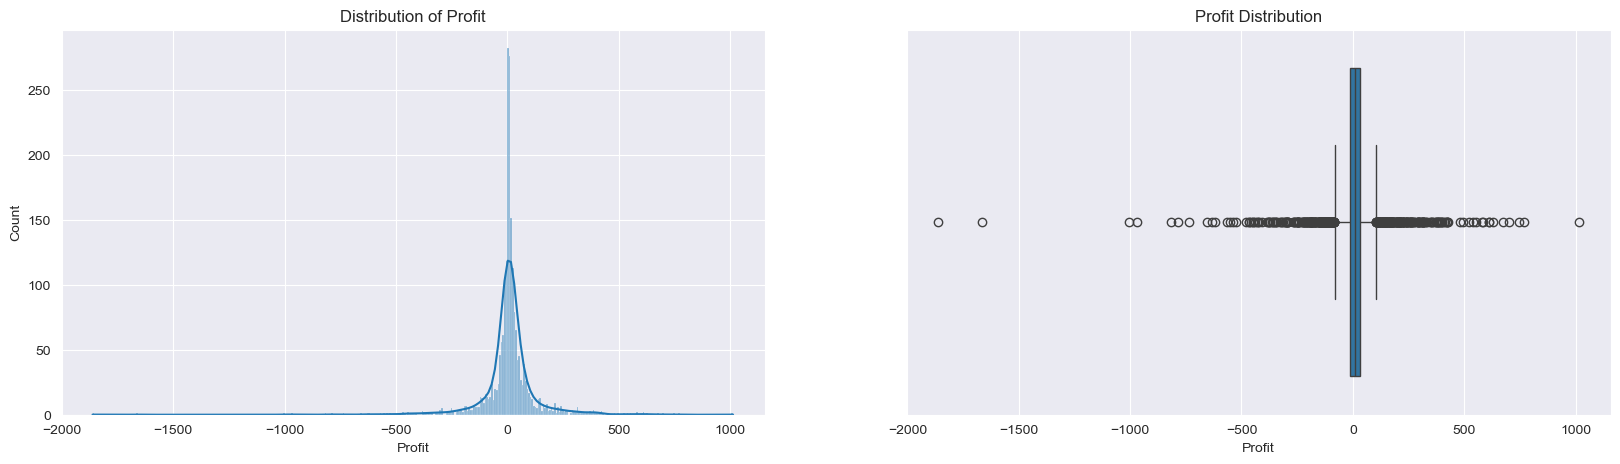

In [23]:
# Analysis of profit
plt.figure(figsize=(20, 5))

# Distribution of profit
plt.subplot(1,2,1)
sns.histplot(data= df, x= "Profit", kde= True)
plt.title("Distribution of Profit")

# Box Plot of profit
plt.subplot(1,2,2)
sns.boxplot(data= df, x= "Profit")
plt.title("Profit Distribution")

### Key Findings

- Total Number of orders are **1764**.
- Total Number of customers are **707**.
- Total Number of products are **375**.
- All products belongs to only one category **Furniture**.
- There are **4**(**Furnishings, Chairs, Tables and Bookcases**) sub-categories of furnitures are sold. The highest selling subcategory is **Furnishings** and **Bookcases** have lowest sale.
- There are **3** segments of customers present. Most of the observations are of **Consumer(1113)**.
- All customers belongs to only one country **United States**.
- Customers are form **4** regions(**West, East, South and Central**) of United Sates. Most of the customers are from **West** region and **South** region has lowest customers.
- Customers are from **48** states of United States. Most number of customers are present in **California(444)**.
- Customers are from **371** cities of different states of of United States. Most number of customers are present in **New York City(192)**.
  
#### Sales Analysis

- The histogram indicates that sales distribution is heavily right-skewed, meaning the majority of transactions are associated with lower sales values. Most of the sales values are clustered around smaller amounts, while a few high-value transactions create a long tail in the distribution.
- The boxplot shows numerous outliers on the higher sales end. These outliers represent transactions with unusually high sales values that significantly deviate from the central tendency. The median sales value is much lower than the maximum, further reflecting the skewed nature of the data.

#### Profit Analysis

- The histogram and KDE plot show that the majority of profit values are concentrated near zero, indicating that most sales generate minimal profit.
- The profit distribution is highly skewed, with a long tail extending toward higher profits. However, these higher profits occur much less frequently.

#### Recomendations

- Investigate the causes of transactions with negative profits, such as discounts, returns, or pricing inefficiencies.
- Focus on optimizing the pricing and marketing strategies for high-selling subcategories (e.g., chairs) to increase overall profitability.
- Conduct subcategory-specific analyses to understand profit and sales trends better and address inefficiencies.

#### Business Implications:

- **Core Revenue Drivers:** A substantial portion of revenue is driven by high-value transactions, which constitute a small percentage of the overall sales.
- **Customer Segmentation:** Identifying and targeting the customer groups or product categories responsible for high-value sales could be an effective strategy for improving profitability.
- **Pricing Strategy:** The skewness suggests potential for better pricing strategies for low-value transactions to increase their average sales contribution.

#### Modeling Considerations:

- For forecasting, it is crucial to address the skewness in sales data, as it can affect the model's performance.
- Consider techniques like log transformation or outlier removal to normalize the data for improved model accuracy.